In [1]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TLS, double-tone
wdq_red_larger = [6.061, 6.1248, 6.2281, 6.3668, 6.5352, 6.7317]
shift_red_larger = [0.06102, 0.1248, 0.2281, 0.3668, 0.5352, 0.7317]
wsb_red_larger = [0.001583, 0.006069, 0.01279, 0.02078, 0.02991, 0.03817]
wdq_blue_larger = [7.0595, 7.1204, 7.2191, 7.3519, 7.5146, 7.7032]
shift_blue_larger = [0.05954, 0.1204, 0.2191, 0.3519, 0.5146, 0.7032]
wsb_blue_larger = [0.001265, 0.004875, 0.01034, 0.01704, 0.02437, 0.03182]
epsfac_larger = [0.5, 1, 1.5, 2, 2.5, 3]
epsq_larger = 0.025*np.asarray(epsfac_larger)
epsc_larger = 0.317*np.asarray(epsfac_larger)

wdq_red_smaller = [3.4568, 3.4015, 3.3125, 3.1939, 3.0511, 2.8873]
shift_red_smaller = [-0.0432, -0.0985, -0.1875, -0.3061, -0.4489, -0.6127]
wsb_red_smaller = [0.00099, 0.003829, 0.008152, 0.01349, 0.01965, 0.0258]
wdq_blue_smaller = [4.4558, 4.3964, 4.3012, 4.1747, 4.0864, 4.0549, 4.0229, 3.9894, 3.9566, 3.8518]
shift_blue_smaller = [-0.0442, -0.1036, -0.1988, -0.3253, -0.4136, -0.4451, -0.4771, -0.5106, -0.5434, -0.6482]
wsb_blue_smaller = [0.00117, 0.00446, 0.009333, 0.01521, 0.01891, 0.02016, 0.02149, 0.02255, 0.02418, 0.02817]
epsfac_smaller_red = [0.5, 1, 1.5, 2, 2.5, 3]
epsfac_smaller_blue = [0.5, 1, 1.5, 2, 2.3, 2.4, 2.5, 2.6, 2.7, 3]
epsq_smaller_red = 0.025*np.asarray(epsfac_smaller_red)
epsc_smaller_red = 0.317*np.asarray(epsfac_smaller_red)
epsq_smaller_blue = 0.025*np.asarray(epsfac_smaller_blue)
epsc_smaller_blue = 0.317*np.asarray(epsfac_smaller_blue)

In [10]:
b, a, nq, nc = ops(2, 10)
Hc = 0.2*2*pi*(a + a.dag())*(b + b.dag())
epsfac_range = np.linspace(0.0, 3.19, 10)
epsq_range = 0.025*epsfac_range
epsc_range = 0.317*epsfac_range

wdq_th_red_larger = list()
wdq_th_blue_larger = list()
wdq_th_red_smaller = list()
wdq_th_blue_smaller = list()

for epsq, epsc in zip(epsq_range, epsc_range):
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc
    wdq_th_red_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 2, epsq=2*epsq*2*pi, dw=0.5*2*pi,
                                      epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    wdq_th_blue_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 2, epsq=2*epsq*2*pi, dw=0.5*2*pi,
                                       epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc
    wdq_th_red_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 2, epsq=2*epsq*2*pi, dw=0.5*2*pi,
                                       epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    wdq_th_blue_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 2, epsq=2*epsq*2*pi, dw=0.5*2*pi,
                                        epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)

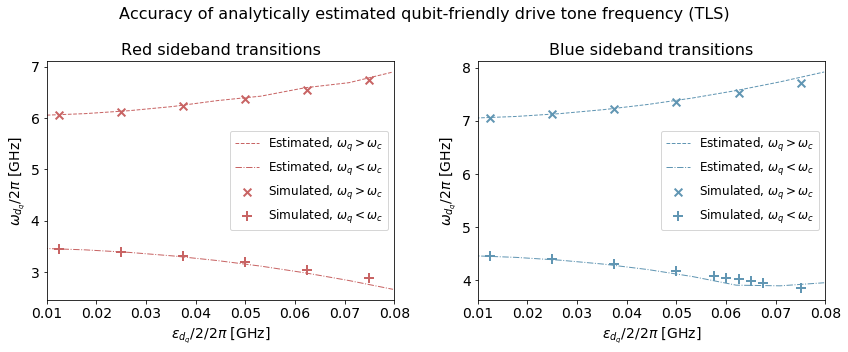

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accuracy of analytically estimated qubit-friendly drive tone frequency (TLS)")

plt.subplot(1, 2, 1)
plt.scatter(epsq_larger, wdq_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(epsq_range, wdq_th_red_larger, '--', c=plotcolours['sbred'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(epsq_smaller_red, wdq_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(epsq_range, wdq_th_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")

plt.xlim([0.01, 0.08])
# plt.ylim([1.10, 1.36])
plt.xlabel("$\\epsilon_{{d_{{q}}}}/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_{{d_{{q}}}}/2\\pi$ [GHz]")
plt.title("Red sideband transitions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(epsq_larger, wdq_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(epsq_range, wdq_th_blue_larger, '--', c=plotcolours['sbblue'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(epsq_smaller_blue, wdq_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(epsq_range, wdq_th_blue_smaller, '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.01, 0.08])
# plt.ylim([4.9, 5.5])
plt.xlabel("$\\epsilon_{{d_{{q}}}}/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_{{d_{{q}}}}/2\\pi$ [GHz]")
plt.title("Blue sideband transitions")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.83)
plt.show()

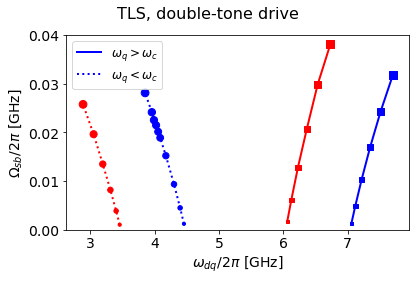

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
fig.suptitle("TLS, double-tone drive")

plt.subplot(1, 1, 1)
plt.scatter(wdq_red_larger, wsb_red_larger, marker='s', c='r', s=20*np.asarray(epsfac_larger))
plt.scatter(wdq_blue_larger, wsb_blue_larger, marker='s', c='b', s=20*np.asarray(epsfac_larger))
plt.scatter(wdq_red_smaller, wsb_red_smaller, marker='o', c='r', s=20*np.asarray(epsfac_smaller_red))
plt.scatter(wdq_blue_smaller, wsb_blue_smaller, marker='o', c='b', s=20*np.asarray(epsfac_smaller_blue))
plt.plot(wdq_red_larger, wsb_red_larger, c='r')
plt.plot(wdq_blue_larger, wsb_blue_larger, c='b', label='$\\omega_q > \\omega_c$')
plt.plot(wdq_red_smaller, wsb_red_smaller, ':', c='r')
plt.plot(wdq_blue_smaller, wsb_blue_smaller, ':', c='b', label='$\\omega_q < \\omega_c$')
plt.ylim([0, 0.04])
plt.xlabel("$\\omega_{{dq}}/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}/2\\pi$ [GHz]")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()